##  **1. Introduction** 

Ini Inroduction Final Project

## **2. Import Libraries** 

In [1]:
#import libraries 
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams

from scipy.stats import boxcox
rcParams['figure.figsize']=10,6

## **3. Data Loading** 

In [2]:
df= pd.read_csv('Ashmore_Dana_Ekuitas_Nusantara.csv.xls')

In [3]:
df

,Date,Price,Open,High,Low,Change %
0,"Dec 11, 2022","1,416.600","1,409.260","1,419.270","1,407.960",1.19%
1,"Dec 04, 2022","1,399.910","1,442.740","1,442.740","1,399.910",-3.43%
2,"Nov 27, 2022","1,449.580","1,428.900","1,458.210","1,428.900",1.24%
3,"Nov 20, 2022","1,431.870","1,423.160","1,436.640","1,421.500",0.66%
4,"Nov 13, 2022","1,422.530","1,426.900","1,429.030","1,416.860",-1.48%
...,...,...,...,...,...,...
276,"Aug 06, 2017","1,459.360","1,451.720","1,476.860","1,451.720",0.21%
277,"Jul 30, 2017","1,456.270","1,478.350","1,478.350","1,456.270",-1.19%
278,"Jul 23, 2017","1,473.860","1,464.820","1,473.860","1,464.820",1.26%
279,"Jul 16, 2017","1,455.550","1,474.060","1,474.060","1,455.550",-1.30%


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      281 non-null    object
 1   Price     281 non-null    object
 2   Open      281 non-null    object
 3   High      281 non-null    object
 4   Low       281 non-null    object
 5   Change %  281 non-null    object
dtypes: object(6)
memory usage: 13.3+ KB


In [5]:
col = ['Price',	'Open',	'High',	'Low']

for i in col:

    df[i] = (df[i]
                # .str.replace(".","")
                .str.replace(",","")
                .astype(float)
                )

df['Change %'] = (df['Change %']
                .str.replace("%"," ")
                # .str.replace(",",".")
                .astype(float)
                )

df["Date"] = pd.to_datetime(df["Date"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      281 non-null    datetime64[ns]
 1   Price     281 non-null    float64       
 2   Open      281 non-null    float64       
 3   High      281 non-null    float64       
 4   Low       281 non-null    float64       
 5   Change %  281 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 13.3 KB


In [7]:
df

,Date,Price,Open,High,Low,Change %
0,2022-12-11,1416.60,1409.26,1419.27,1407.96,1.19
1,2022-12-04,1399.91,1442.74,1442.74,1399.91,-3.43
2,2022-11-27,1449.58,1428.90,1458.21,1428.90,1.24
3,2022-11-20,1431.87,1423.16,1436.64,1421.50,0.66
4,2022-11-13,1422.53,1426.90,1429.03,1416.86,-1.48
...,...,...,...,...,...,...
276,2017-08-06,1459.36,1451.72,1476.86,1451.72,0.21
277,2017-07-30,1456.27,1478.35,1478.35,1456.27,-1.19
278,2017-07-23,1473.86,1464.82,1473.86,1464.82,1.26
279,2017-07-16,1455.55,1474.06,1474.06,1455.55,-1.30


## **4. EDA (Exploratory Data Analysis)**

Text(0.5, 1.0, 'Plotting Price against the Entire Timeframe For all the columns')

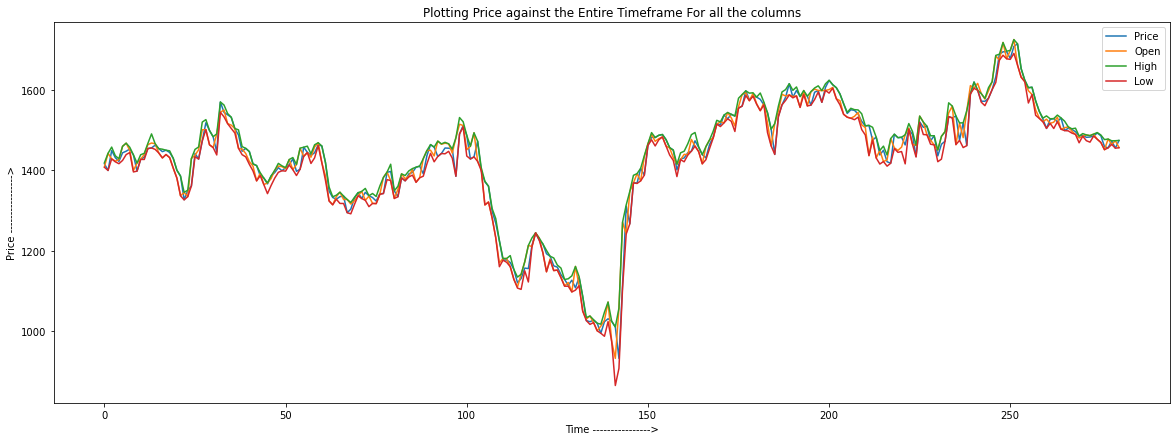

In [8]:
df[['Price','Open',	'High',	'Low']].plot(figsize=(20,7))
plt.legend(loc="best")
plt.xlabel("Time ---------------->")
plt.ylabel("Price ---------------->")
plt.title("Plotting Price against the Entire Timeframe For all the columns")

In [9]:
df = df.sort_values(['Date'],ascending=True).reset_index()

In [10]:
df

,index,Date,Price,Open,High,Low,Change %
0,280,2017-07-09,1474.65,1457.32,1474.79,1456.55,0.38
1,279,2017-07-16,1455.55,1474.06,1474.06,1455.55,-1.30
2,278,2017-07-23,1473.86,1464.82,1473.86,1464.82,1.26
3,277,2017-07-30,1456.27,1478.35,1478.35,1456.27,-1.19
4,276,2017-08-06,1459.36,1451.72,1476.86,1451.72,0.21
...,...,...,...,...,...,...,...
276,4,2022-11-13,1422.53,1426.90,1429.03,1416.86,-1.48
277,3,2022-11-20,1431.87,1423.16,1436.64,1421.50,0.66
278,2,2022-11-27,1449.58,1428.90,1458.21,1428.90,1.24
279,1,2022-12-04,1399.91,1442.74,1442.74,1399.91,-3.43


In [11]:
new_df=df[['Date','High','Low']]

In [12]:
new_df=new_df.set_index(['Date'])

In [13]:
new_df

,High,Low
Date,,
2017-07-09,1474.79,1456.55
2017-07-16,1474.06,1455.55
2017-07-23,1473.86,1464.82
2017-07-30,1478.35,1456.27
2017-08-06,1476.86,1451.72
...,...,...
2022-11-13,1429.03,1416.86
2022-11-20,1436.64,1421.50
2022-11-27,1458.21,1428.90


In [36]:
new_df.to_csv('Ashmore_Dana_Ekuitas_Nusantara_HL.csv')

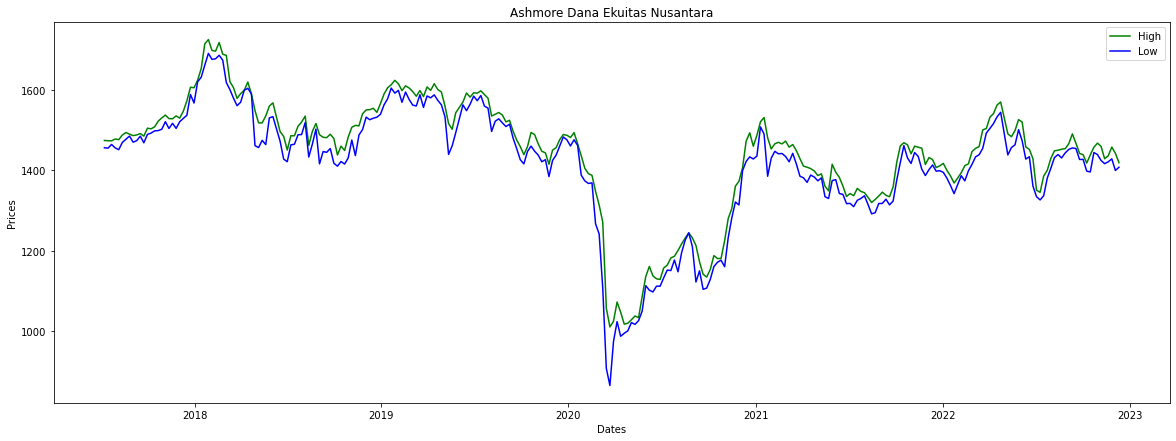

In [38]:
plt.figure(figsize=(20,7))
plt.plot(new_df['High'], color='green', label='High')
plt.plot(new_df['Low'], color='blue', label='Low')
plt.title('Ashmore Dana Ekuitas Nusantara')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

## **5. Data Preprocessing**

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 1152x648 with 0 Axes>

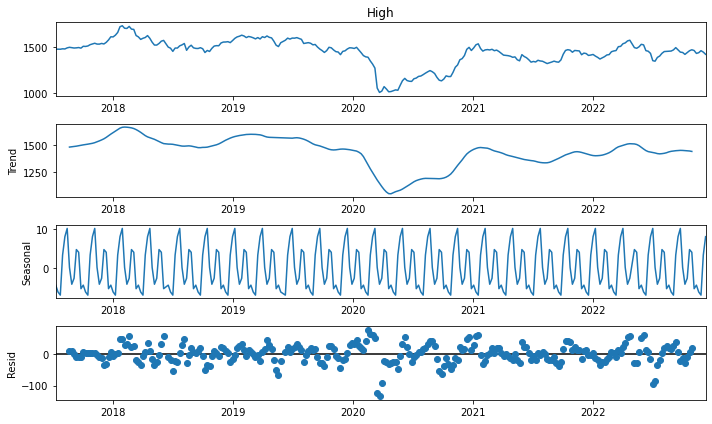

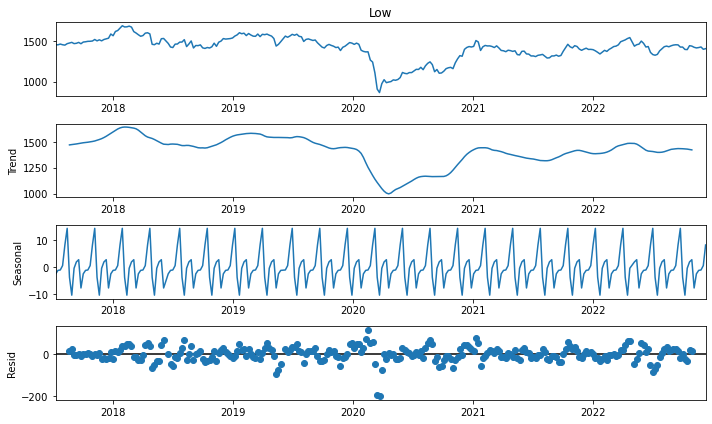

In [16]:
fig = plt.figure() 
fig.set_size_inches(16, 9)

result_H = seasonal_decompose(new_df['High'], period=12)
result_L = seasonal_decompose(new_df['Low'], period=12)
 
fig = result_H.plot() 
fig = result_L.plot() 

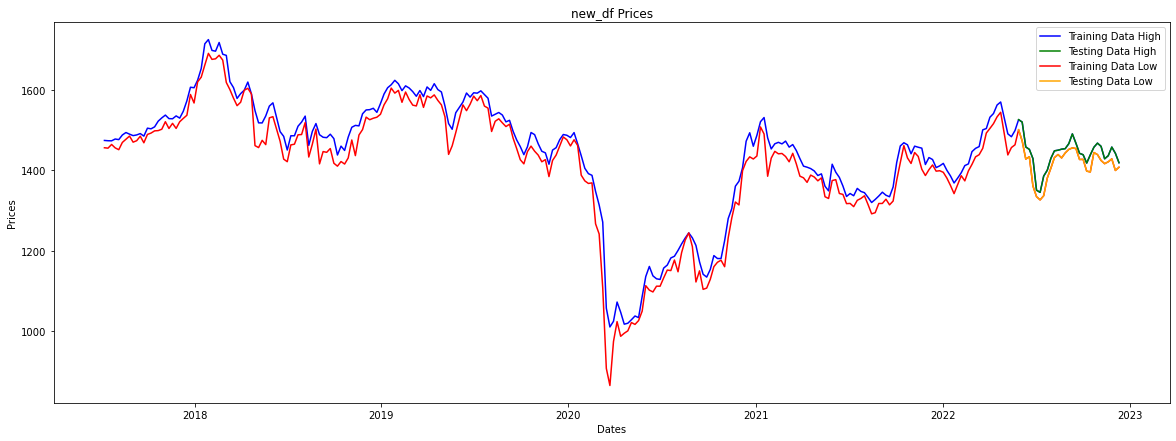

In [17]:
train_data, test_data = new_df[0:int(len(new_df)*0.9)], new_df[int(len(new_df)*0.9):]


plt.figure(figsize=(20,7))
plt.title('new_df Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(new_df['High'], 'blue', label='Training Data High')
plt.plot(test_data['High'], 'green', label='Testing Data High')
plt.plot(new_df['Low'], 'red', label='Training Data Low')
plt.plot(test_data['Low'], 'orange', label='Testing Data Low')
plt.legend()

In [18]:
train_data

,High,Low
Date,,
2017-07-09,1474.79,1456.55
2017-07-16,1474.06,1455.55
2017-07-23,1473.86,1464.82
2017-07-30,1478.35,1456.27
2017-08-06,1476.86,1451.72
...,...,...
2022-04-17,1563.15,1533.65
2022-04-24,1570.66,1545.03
2022-05-08,1491.21,1438.64


## **6. Modeling**

### **6.1 Model Definition**

We will use ARIMA for the time series prediction

### **6.2 Model Training**

In [19]:
!pip install pmdarima

In [20]:
from pmdarima.arima import auto_arima

model_autoARIMA_High = auto_arima(new_df['High'], start_p=0, d=1, start_q=0,
                                   max_p=5, max_d=5, max_q=5, start_P=0,
                                   D=1, start_Q=0, max_P=5, max_D=5,
                                   max_Q=5, m=4, seasonal=True,
                                   error_action='warn', trace=True,
                                   supress_warning=True, stepwise=True,
                                   random_state=420, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=2780.895, Time=0.17 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=2677.387, Time=0.24 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=inf, Time=0.22 sec
 ARIMA(1,1,0)(0,1,0)[4]             : AIC=2759.920, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[4]             : AIC=2665.161, Time=0.23 sec
 ARIMA(1,1,0)(3,1,0)[4]             : AIC=2654.798, Time=0.27 sec
 ARIMA(1,1,0)(4,1,0)[4]             : AIC=2644.653, Time=0.38 sec
 ARIMA(1,1,0)(5,1,0)[4]             : AIC=2636.781, Time=0.49 sec
 ARIMA(1,1,0)(5,1,1)[4]             : AIC=inf, Time=2.10 sec
 ARIMA(1,1,0)(4,1,1)[4]             : AIC=inf, Time=0.65 sec
 ARIMA(0,1,0)(5,1,0)[4]             : AIC=2658.560, Time=0.33 sec
 ARIMA(2,1,0)(5,1,0)[4]             : AIC=2637.652, Time=0.49 sec
 ARIMA(1,1,1)(5,1,0)[4]             : AIC=2638.020, Time=0.59 sec
 ARIMA(0,1,1)(5,1,0)[4]             : AIC=2636.794, Time=0.45 sec
 ARIMA(2,1,1)(5,1,0)[4]             : AIC=2639.2

In [21]:
model_autoARIMA_Low = auto_arima(new_df['Low'], start_p=0, d=1, start_q=0,
                                   max_p=5, max_d=5, max_q=5, start_P=0,
                                   D=1, start_Q=0, max_P=5, max_D=5,
                                   max_Q=5, m=4, seasonal=True,
                                   error_action='warn', trace=True,
                                   supress_warning=True, stepwise=True,
                                   random_state=420, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=2920.637, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=2834.428, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=inf, Time=0.36 sec
 ARIMA(1,1,0)(0,1,0)[4]             : AIC=2917.319, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[4]             : AIC=2817.921, Time=0.15 sec
 ARIMA(1,1,0)(3,1,0)[4]             : AIC=2807.546, Time=0.26 sec
 ARIMA(1,1,0)(4,1,0)[4]             : AIC=2787.562, Time=0.43 sec
 ARIMA(1,1,0)(5,1,0)[4]             : AIC=2779.879, Time=0.39 sec
 ARIMA(1,1,0)(5,1,1)[4]             : AIC=inf, Time=1.18 sec
 ARIMA(1,1,0)(4,1,1)[4]             : AIC=inf, Time=0.98 sec
 ARIMA(0,1,0)(5,1,0)[4]             : AIC=2781.936, Time=0.55 sec
 ARIMA(2,1,0)(5,1,0)[4]             : AIC=2781.879, Time=0.79 sec
 ARIMA(1,1,1)(5,1,0)[4]             : AIC=2781.879, Time=0.79 sec
 ARIMA(0,1,1)(5,1,0)[4]             : AIC=2779.972, Time=0.46 sec
 ARIMA(2,1,1)(5,1,0)[4]             : AIC=2783.8

In [22]:
import warnings
warnings.filterwarnings(action='ignore')

In [23]:
# High

def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

train_ar_High = train_data['High'].values
test_ar_High = test_data['High'].values

history_High = [x for x in train_ar_High]
print(type(history_High))
predictions_High = list()
for t in range(len(test_ar_High)):
    model_High = ARIMA(history_High, order=(5,1,0))
    model_fit = model_High.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions_High.append(yhat)
    obs = test_ar_High[t]
    history_High.append(obs)


<class 'list'>


In [24]:
# Low

def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

train_ar_Low = train_data['Low'].values
test_ar_Low = test_data['Low'].values

history_Low = [x for x in train_ar_Low]
print(type(history_Low))
predictions_Low = list()
for t in range(len(test_ar_Low)):
    model_Low = ARIMA(history_Low, order=(5,1,0))
    model_fit = model_Low.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions_Low.append(yhat)
    obs = test_ar_Low[t]
    history_Low.append(obs)


<class 'list'>


### **6.3 Model Evaluasi**

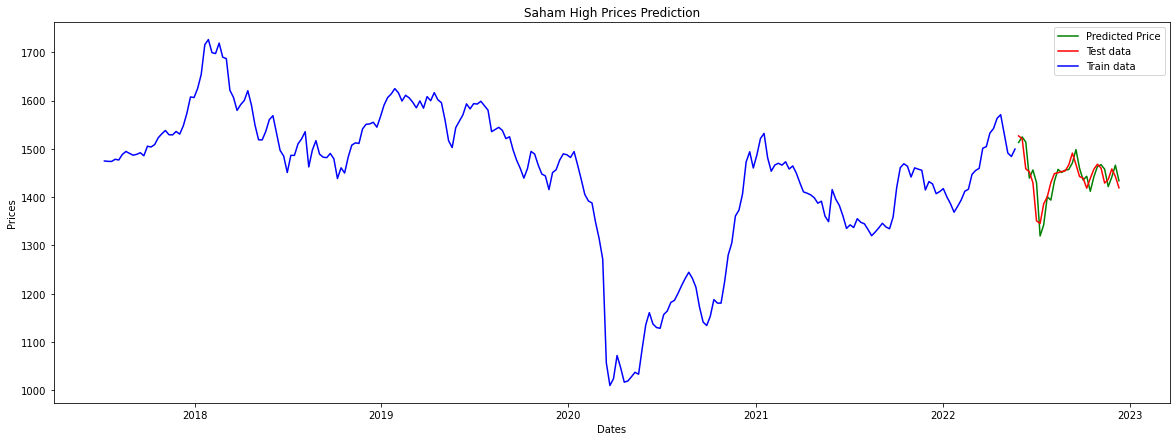

In [25]:
plt.figure(figsize=(20,7))

plt.plot(test_data.index, predictions_High, color='green', label='Predicted Price')
plt.plot(test_data.index, test_data["High"], color='red', label='Test data')
plt.plot(train_data.index, train_data["High"], color='blue', label='Train data')
plt.title('Saham High Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

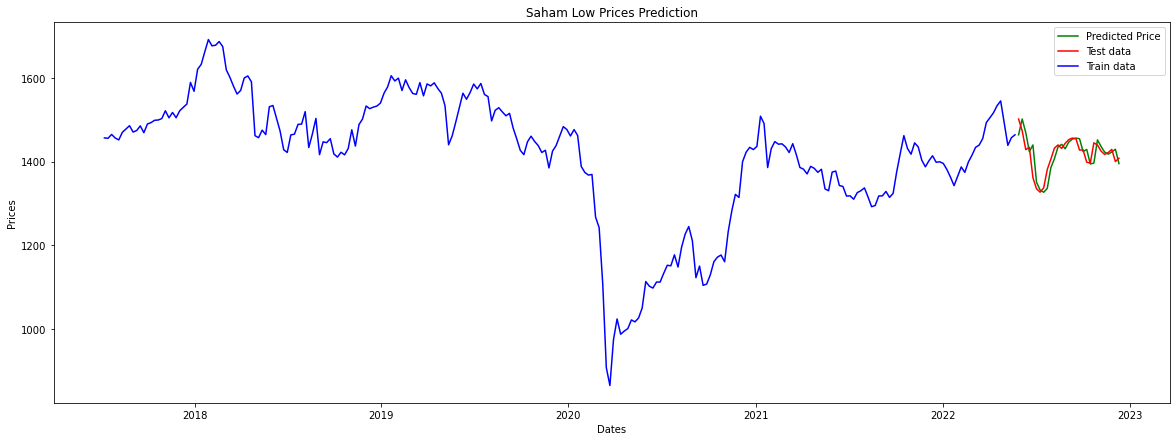

In [26]:
plt.figure(figsize=(20,7))

plt.plot(test_data.index, predictions_Low, color='green', label='Predicted Price')
plt.plot(test_data.index, test_data["Low"], color='red', label='Test data')
plt.plot(train_data.index, train_data["Low"], color='blue', label='Train data')
plt.title('Saham Low Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

In [27]:
# High

actual_High=pd.DataFrame()
actual_High=pd.DataFrame(test_ar_High,columns=["Actual_High"])
predicted_High=pd.DataFrame(list(predictions_High),columns=["Predicted_High"])
actual_High=actual_High.reset_index(drop=True)
predicted_High=predicted_High.reset_index(drop=True)
output_High=pd.concat([actual_High,predicted_High],axis=1)

# Low

actual_Low=pd.DataFrame()
actual_Low=pd.DataFrame(test_ar_Low,columns=["Actual_Low"])
predicted_Low=pd.DataFrame(list(predictions_Low),columns=["Predicted_Low"])
actual_Low=actual_Low.reset_index(drop=True)
predicted_Low=predicted_Low.reset_index(drop=True)
output_Low=pd.concat([actual_Low,predicted_Low],axis=1)

output = pd.concat([output_High, output_Low], axis=1)
output

,Actual_High,Predicted_High,Actual_Low,Predicted_Low
0,1526.72,1513.123532,1501.74,1463.877163
1,1520.58,1524.715789,1473.57,1501.756842
2,1458.54,1514.019269,1428.36,1469.195739
3,1452.53,1439.236757,1434.20,1423.574926
4,1429.52,1456.173392,1361.16,1439.652969
5,1350.82,1429.904793,1334.67,1350.431484
6,1345.38,1319.423496,1326.53,1331.853892
7,1385.95,1342.524202,1336.91,1326.330078
8,1400.52,1400.704491,1380.97,1335.664997
9,1430.06,1393.730766,1405.61,1385.103744


In [28]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [29]:
# High

MEAN_High = new_df['High'].mean()
MAE_High = mean_absolute_error(output['Actual_High'], output['Predicted_High'])
MSE_High = mean_squared_error(output['Actual_High'], output['Predicted_High'])
RMSE_High = np.sqrt(mean_squared_error(output['Actual_High'], output['Predicted_High']))
MAPE_High = mean_absolute_percentage_error(output['Actual_High'], output['Predicted_High'])

# Low

MEAN_Low = new_df['Low'].mean()
MAE_Low = mean_absolute_error(output['Actual_Low'], output['Predicted_Low'])
MSE_Low = mean_squared_error(output['Actual_Low'], output['Predicted_Low'])
RMSE_Low = np.sqrt(mean_squared_error(output['Actual_Low'], output['Predicted_Low']))
MAPE_Low = mean_absolute_percentage_error(output['Actual_Low'], output['Predicted_Low'])

In [30]:
nilai = [MEAN_High,MAE_High,MSE_High,RMSE_High,MAPE_High,MEAN_Low,MAE_Low,MSE_Low,RMSE_Low,MAPE_Low]
MEAN = []
MAE = []
MSE = []
RMSE = []
MAPE = []
for i in nilai:
    MEAN.append(MEAN_High)
    MAE.append(MAE_High)
    MSE.append(MSE_High)
    RMSE.append(RMSE_High)
    MAPE.append(MAPE_High)
    MEAN.append(MEAN_Low)
    MAE.append(MAE_Low)
    MSE.append(MSE_Low)
    RMSE.append(RMSE_Low)
    MAPE.append(MAPE_Low)
predict = ['High','Low']
score = pd.DataFrame(predict)
score.rename(columns={0:'Predict'},inplace = True)
score['MEAN']= (MEAN_High,MEAN_Low)
score['MAE']= (MAE_High,MAE_Low)
score['MSE']= (MSE_High,MSE_Low)
score['RMSE']=(RMSE_High,RMSE_Low)
score['MAPE']=(MAPE_High,MAPE_Low)

score

,Predict,MEAN,MAE,MSE,RMSE,MAPE
0,High,1442.572028,20.117349,693.093742,26.326674,0.014113
1,Low,1413.953452,18.952380,670.131085,25.886890,0.013408


## **7. Prediction**

In [31]:
# Create date for the predicted month
index_new = pd.DataFrame(pd.date_range('2022-12-18', periods=4, freq='W').to_period('D'), columns=['Date'])
index_new = pd.DataFrame(index_new['Date'].dt.to_timestamp(freq='W'))
index_new

,Date
0,2022-12-18
1,2022-12-25
2,2023-01-01
3,2023-01-08


In [32]:
# High

result_High =  model_High.fit()
  
# Forecast for the next 4 week
forecast_High = result_High.predict(start = len(new_df), 
                          end = (len(new_df)-1) + 4, 
                          typ = 'levels')

forecast_High = pd.concat([index_new.reset_index(drop=True), pd.DataFrame(forecast_High,columns=["Forecast"])], axis=1).set_index(["Date"])
forecast_High

,Forecast
Date,
2022-12-18,1430.046836
2022-12-25,1432.576394
2023-01-01,1433.039685
2023-01-08,1432.011568


In [39]:
forecast_High.to_csv('High Forecast.csv')

In [33]:
# Low

result_Low =  model_Low.fit()
  
# Forecast for the next 4 week
forecast_Low = result_Low.predict(start = len(new_df), 
                          end = (len(new_df)-1) + 4, 
                          typ = 'levels')

forecast_Low = pd.concat([index_new.reset_index(drop=True), pd.DataFrame(forecast_Low,columns=["Forcast"])], axis=1).set_index(["Date"])
forecast_Low

,Forcast
Date,
2022-12-18,1395.616624
2022-12-25,1396.287800
2023-01-01,1395.609894
2023-01-08,1395.055427


In [40]:
forecast_Low.to_csv('Low Forecast.csv')

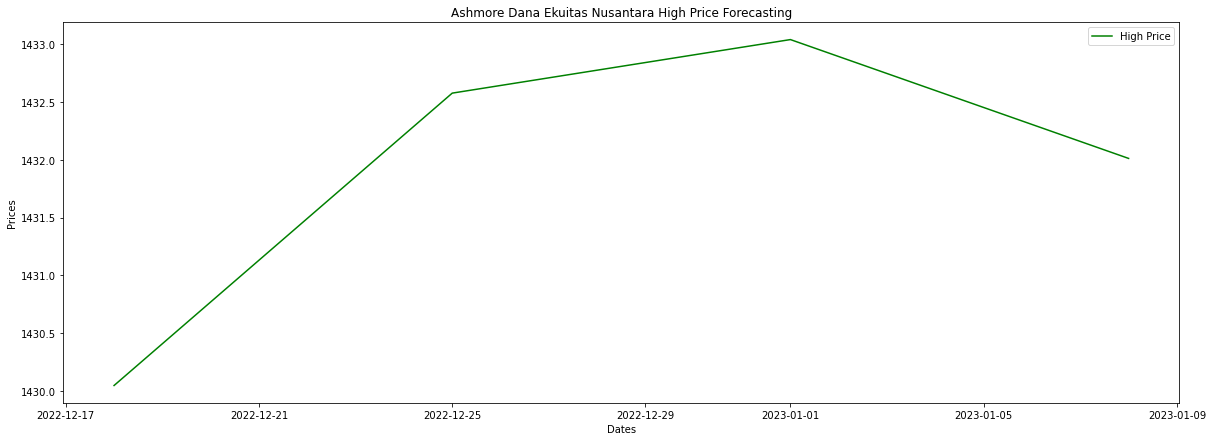

In [42]:
plt.figure(figsize=(20,7))
plt.plot(forecast_High, color='green', label='High Price')
plt.title('Ashmore Dana Ekuitas Nusantara High Price Forecasting')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

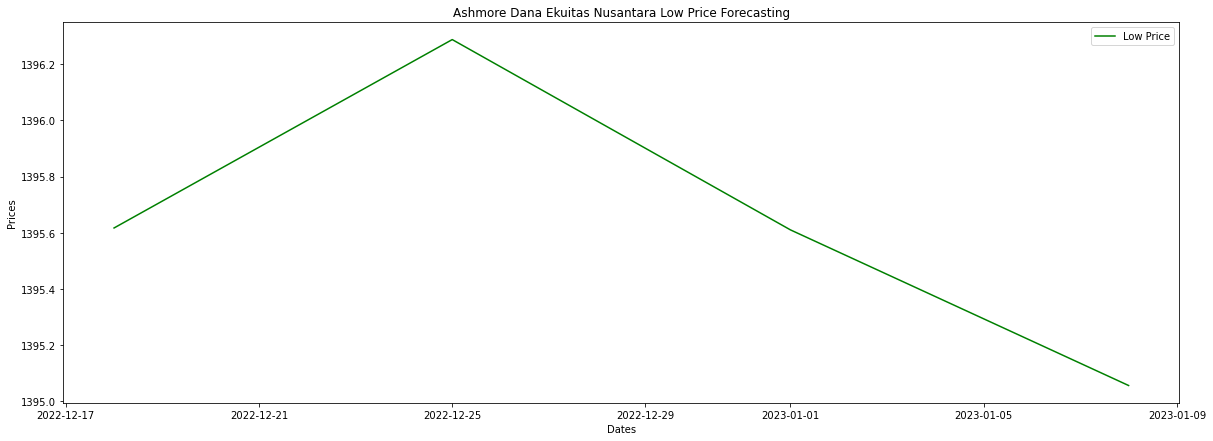

In [43]:
plt.figure(figsize=(20,7))
plt.plot(forecast_Low, color='green', label='Low Price')
plt.title('Ashmore Dana Ekuitas Nusantara Low Price Forecasting')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()